Весь процесс доставки — от приема в отделении до вручения получателю — состоит из большого числа операций. Отправление запаковывают, перевозят на склад и транспортируют между сортировочными пунктами. Если доставка едет из-за границы, то дополнительно появляются операции на зарубежной и российской таможне.

Ускорить и удешевить доставку помогают крупные логистические хабы. Там мелкие грузы сортируются и отправляются в соседние регионы или собираются в новые контейнеры для отправки в другие макрорегионы. Таким образом, почтовые отправления путешествуют по сети сортировочных центров, как кровь по капиллярам, и в конце концов добираются в любые точки нашей страны.

Несмотря на высокий уровень системы безопасности, по-прежнему остается риск пропаж или порчи отправлений: перемещений и операций с посылками очень много, кроме того, в процессе может сыграть человеческий фактор.

Точное предсказание пропаж и их локализация позволит повысить надежность системы — гарантировать доставку отправлений в срок и снизить расходы на транспортировку. Предлагаем участникам чемпионата решить эту задачу — разработать модель предсказания потери почтовых отправлений.

# Import and description of dataset



In [ ]:
from plotly import express
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
import math

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score
from sklearn import metrics  
from sklearn import preprocessing

pd.set_option('display.max_columns',100) 
pd.set_option('display.max_rows',100)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_dataset_pochta.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA & Feature engeeniring

Пояснения к столбцам
1. oper_type + oper_attr Тип и атрибут операции
2. index_oper Индекс места операции
3. type Обозначение типа объекта почтовой связи
4. priority Приоритет объекта
5. is_privatecategory Y - является отделением закрытого типа N - иначе
6. class Значение класса или категории объекта почтовой связи
7. is_in_yandex Y - адрес отделения связи отображается в Яндекс-картах N - иначе
8. is_return Y - Отправление движется в направлении возврата отправителю N  иначе
9. weight Вес в граммах
10. mailtype Код вида отправления
11. mailctg Код категории почтового отправления
12. mailrank Код разряда почтового отправления
13. directctg Код классификации отправления
14. transport_pay Общая сумма платы за пересылку в условной валюте
15. postmark Код отметки
16. name_mfi Наименование вложений, указывается на бирке отправления
17. weight_mfi Суммарная масса вложений
18. price_mfi Суммарная стоимость вложений в условной валюте
19. dist_qty_oper_login_1 Количество уникальных имен операторов, задействованных в обработке данного типа отправлений (mailtype) на конкретном индексе, по которым возможно идентифицировать оператора
20. total_qty_oper_login_1 Количество отправлений с уникальным именем операторов,
задействованных в обработке данного типа отправлений (mailtype) на конкретном индексе, по которым возможно идентифицировать оператора
21. total_qty_oper_login_0 Количество отправлений данного типа (mailtype), которые были обработаны неизвестным оператором на этом индексе
22. total_qty_over_index_and_type Общее количество отправлений данного типа (mailtype),  прошедших обработку на этом индексе
23. total_qty_over_index Общее количество отправлений, прошедших обработку
на этом индексе
24. is_wrong_sndr_name Есть ли явные признаки, что имя отправителя введено некорректно? 1 - да, 0 - иначе
25. is_wrong_rcpn_name Есть ли явные признаки, что имя получателя введено
некорректно? 1 - да, 0 - иначе
26. is_wrong_phone_number Есть ли явные признаки, что номер телефона получателя
введен некорректно? 1 - да, 0 - иначе
27. is_wrong_address Есть ли явные признаки, что адрес получателя введен
некорректно? 1 - да, 0 - иначе
28. label
СТРОКА ДЛЯ ПРЕДСКАЗАНИЯ
1 - операция, на которой цифровой след оборвался, т.к.
отправление потеряно
0 - отправление было вручено или возвращено jтправителю


In [ ]:
df.head(2)

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,5.0,1.0,0.0,2.0,0.0,0.0,"Fishhook,USB",41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,5.0,1.0,0.0,2.0,0.0,0.0,"screen protector,Case(Q613B),case(208B40-DB)",68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0


In [ ]:
df.shape

(6000000, 29)

In [ ]:
# проверка на дубликаты строк
df.loc[df.duplicated()]

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label


In [ ]:
def description(df):
    tmp = df.describe()
    tmp.loc['nan'] = [df[el].isna().sum() for el in df.describe().columns]
    #temp.loc['duplicates'] = [data.duplicated().sum() for el in df.describe().columns]
    tmp
    
    for el in df.columns:
        print(el)
        print(df[el].value_counts(dropna=False))
        print(f'NAN:{df[el].isna().sum()}')
        print(f' Unique:{df[el].nunique()}')
        print()

In [ ]:
description(df)

id
6818780    1
1236699    1
4090073    1
7722817    1
3414179    1
          ..
2573822    1
654869     1
1616887    1
1384821    1
6423388    1
Name: id, Length: 6000000, dtype: int64
NAN:0
 Unique:6000000

oper_type + oper_attr
1020_-1    693154
1022_-1    656597
1019_-1    413710
8_0        402877
1_-1       359402
            ...  
2_2             1
12_6            1
2_11            1
2_10            1
1009_-1         1
Name: oper_type + oper_attr, Length: 109, dtype: int64
NAN:0
 Unique:109

index_oper
102976      938416
102976.0    661191
102971      476859
102971.0    341402
620984       80811
             ...  
347566.0         1
397724           1
353710.0         1
668412           1
164553.0         1
Name: index_oper, Length: 38661, dtype: int64
NAN:0
 Unique:38661

type
Цех               2093668
ММПО              1614974
Участок            926631
ГОПС               463750
ТИ                 305490
П                  245814
МСЦ                223241
СОПС                721

Удалим ненужные столбцы, где все 0 или более 80% нулей - значения в label не удалились

In [ ]:
df= df.drop(columns=['id','postmark', 'mailrank'])

#'transport_pay'

Столбец mailtype Код вида отправления - почти все значения 5.0, пересечение с целевой меткой 0,1%

In [ ]:
df= df.drop(columns=['mailtype'])

Также удалим столбец с данными двигается письмо адресату или уже возвращается, так 0.09% соответствует целевой метке

In [ ]:
df.query('is_return == "Y" and label == 1').shape

(155, 25)

In [ ]:
df= df.drop(columns=['is_return'])

В столбце transport_pay 4 млн значений 0, но 10000 уникальных значений. Переведем его в логическое 0 - нет, 1 - да

In [ ]:
df.loc[(df.transport_pay > 0), 'transport_pay'] = 1
df.transport_pay.value_counts()

0.0    4120507
1.0    1879493
Name: transport_pay, dtype: int64

Также удалим столбец с данными о типе отделения, так 0.1% соответствует целевой метке

In [ ]:
df.query('is_privatecategory == "Y" and label == 1').shape

(285, 24)

In [ ]:
df= df.drop(columns=['is_privatecategory'])

В столбцах со значениями Y/N удалим нули ( их всего 2670 значений) и преобразуем в числовые - значения в label не удалились

In [ ]:
def size(x, y):
  return plt.figure(figsize = (x, y))

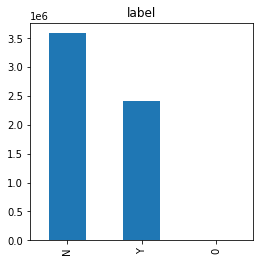

In [ ]:
size(4, 4)
df.is_in_yandex.value_counts().plot(kind='bar', title='label')

In [ ]:
# значение 0 является строковым
df = df.drop(df[df.is_in_yandex == '0'].index)

In [ ]:
# df[bool_feat] = df[bool_feat].replace('Y', 1)
# df[bool_feat] = df[bool_feat].replace('N', 0)

df['is_in_yandex'] = df['is_in_yandex'].replace('Y', 1)
df['is_in_yandex'] = df['is_in_yandex'].replace('N', 0)

In [ ]:
df['label'].value_counts()

0    5826350
1     170980
Name: label, dtype: int64

Посмотрим графически на целевой признак: очевиден дисбаланс классов

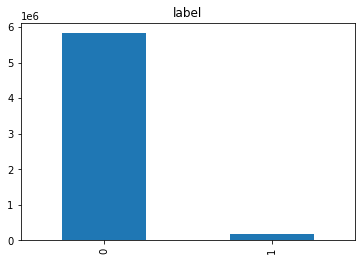

In [ ]:
df.label.value_counts().plot(kind='bar', title='label')



Random under-sampling

In [ ]:
# count_class_0, count_class_1 = df.label.value_counts()

# df_class_0 = df[df['label'] == 0]
# df_class_1 = df[df['label'] == 1]

# df_class_0_under = df_class_0.sample(count_class_1)
# df = pd.concat([df_class_0_under, df_class_1], axis=0)

# print('Random under-sampling:')
# print(df.label.value_counts())

# df.label.value_counts().plot(kind='bar', title='Count (target)')

Class переименуем, чтоб выполнить ряд операций. И поделим тоже на 2 класса: 0 и остальные - 1

In [ ]:
df['class_mail'] = df['class']
df = df.drop(columns = ['class']) 

In [ ]:
df.loc[(df.class_mail > 0), 'class_mail'] = 1
df.class_mail.value_counts()

0.0    5212175
1.0     785155
Name: class_mail, dtype: int64

Назначение данных столбцов не совсем ясно, посмотрим поближе графически с логарифмированием (это нужно, чтобы понять насколько схожи данные в разных столюцах)

In [ ]:
similar_feat = df[['dist_qty_oper_login_1', 'total_qty_oper_login_1', 'total_qty_oper_login_0', 'total_qty_over_index_and_type', 'total_qty_over_index']]

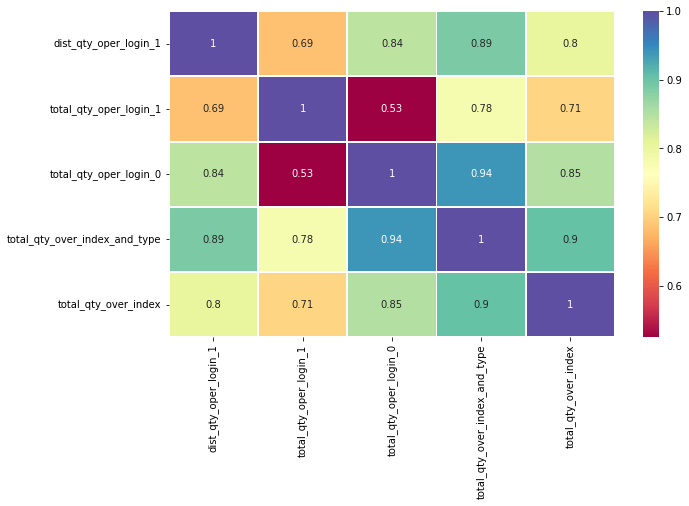

In [ ]:
size(10, 6)
sns.heatmap(similar_feat.corr(), annot = True, linewidths=0.8, cmap = 'Spectral')

Удалим столбцы с высокой корреляцией

In [ ]:
df = df.drop(columns = ['total_qty_over_index', 'total_qty_over_index_and_type', 'dist_qty_oper_login_1'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


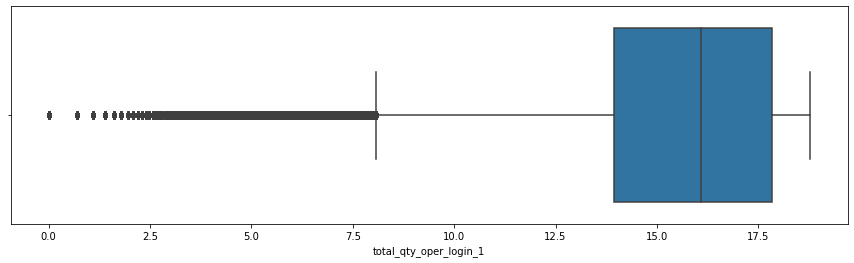

In [ ]:
size(15,4)
sns.boxplot(np.log(df['total_qty_oper_login_1']))

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


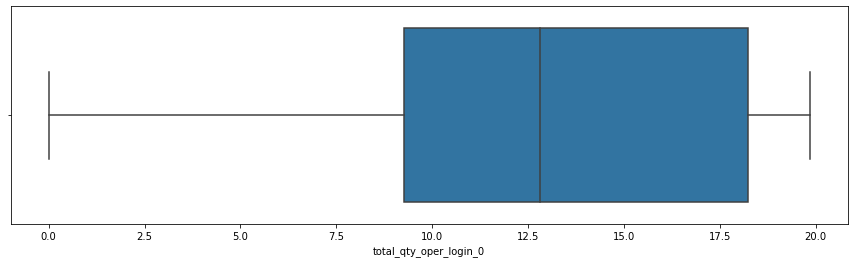

In [ ]:
size(15,4)
sns.boxplot(np.log(df['total_qty_oper_login_0']))

Был попробован способ убрать нули и логарифмировать, но эти столбцы выдают высокую корреляцию с другими (как + так и -), поэтому принимаю решение их удалить. Код ниже.

In [ ]:
#df.query('total_qty_oper_login_1==0')
#df = df.drop(df[df.total_qty_oper_login_1 == 0].index)
#df.query('total_qty_oper_login_0==0')
#df = df.drop(df[df.total_qty_oper_login_0 == 0].index)

#df['dist_qty_oper_login_1'] = np.log(df['dist_qty_oper_login_1'])
#df['total_qty_oper_login_1'] = np.log(df['total_qty_oper_login_1'])
#df['total_qty_oper_login_0'] = np.log(df['total_qty_oper_login_0'])
#df['total_qty_over_index_and_type'] = np.log(df['total_qty_over_index_and_type'])

#df['dist_qty_oper_login_1'] = np.log(df['dist_qty_oper_login_1'])
#df['total_qty_oper_login_1'] = np.log(df['total_qty_oper_login_1'])
#df['total_qty_oper_login_0'] = np.log(df['total_qty_oper_login_0'])
#df['total_qty_over_index_and_type'] = np.log(df['total_qty_over_index_and_type'])

#df['dist_qty_oper_login_1'] = df['dist_qty_oper_login_1'].astype(np.float32)
#df['total_qty_oper_login_1'] = df['total_qty_oper_login_1'].astype(np.float32)
#df['total_qty_oper_login_0'] = df['total_qty_oper_login_0'].astype(np.float32)
#df['total_qty_over_index_and_type'] = df['total_qty_over_index_and_type'].astype(np.float64)
#df['total_qty_over_index'] = df['total_qty_over_index'].astype(np.int64)

In [ ]:
df = df.drop(columns = ['total_qty_oper_login_1', 'total_qty_oper_login_0'])

Столбец index_oper содержит числовые и сторовые значения, но по факту эти значения должны быть числовыми

In [ ]:
df['index_oper'] = df['index_oper'].astype(np.float64)
df['index_oper'] = df['index_oper'].astype(np.int64)

In [ ]:
df['index_oper'].value_counts()

102976    1611563
102971     831679
620984     136389
102998     107961
102968      98751
           ...   
188417          1
453201          1
397467          1
659792          1
422418          1
Name: index_oper, Length: 20684, dtype: int64

Перевод числовых данных в формат int8 с проверкой с целью уменьшения размера данных

In [ ]:
df['weight_mfi'] = df['weight_mfi'].astype(np.int64)
df['price_mfi'] = df['price_mfi'].astype(np.int64)
df['weight'] = df['weight'].astype(np.int64)
df['priority'] = df['priority'].astype(np.int8)
df['class_mail'] = df['class_mail'].astype(np.int8)
#df['mailtype'] = df['mailtype'].astype(np.int8)
df['mailctg'] = df['mailctg'].astype(np.int8)
df['directctg'] = df['directctg'].astype(np.int8)


In [ ]:
num_feat = df.select_dtypes('int64')
for el in num_feat:
    for n_type in (np.int32, np.int16, np.int8):
        if (df[el] == df[el].astype(n_type)).sum() == len(df):
            df[el] = df[el].astype(n_type)

In [ ]:
num_feat = df.select_dtypes(exclude = 'object')

In [ ]:
df['name_mfi'].value_counts()

0                                                                                   814649
Mobile Phone Bags & Cases                                                            48155
Screen Protectors                                                                    45021
phone case                                                                           42686
Phone Case                                                                           25024
                                                                                     ...  
Hats&Caps                                                                                1
phone case(C20042301-57)                                                                 1
Mp4accessories CY91939_04(A5F-17D2-03*1),Mp4accessories CY91939_04(A5F-17                1
phone case(Maorong-Mi Note 10 Li,phone case(Maorong-Mi Note 10 Lite-Rabbit Gray)         1
Piston Rings PR-PW60-2SET(PR-PW60-2SET),Piston Rings PR-PW60-2SET(PR-PW6                 1

In [ ]:
df.name_mfi = df.name_mfi.str.lower()

In [ ]:
cat_feat = df.select_dtypes(include='object')
cat_feat.describe()

,oper_type + oper_attr,type,name_mfi
count,5997330,5997330,5997330
unique,109,20,202760
top,1020_-1,Цех,0
freq,693154,2093668,814649


In [ ]:
df['type'] = df['type'].replace(0, 'unknown')
df['oper_type + oper_attr'] = df['oper_type + oper_attr'].replace(0, 'unknown')
df['name_mfi'] = df['name_mfi'].replace(0, 'unknown')


for columns in cat_feat:
  encoder = preprocessing.LabelEncoder()
  encoder = encoder.fit(df[columns])
  df[columns] = encoder.transform(df[columns])


In [ ]:
df['is_wrong_rcpn'] = df['is_wrong_rcpn_name'] + df['is_wrong_phone_number'] + df['is_wrong_address']

In [ ]:
df = df.drop(columns = ['is_wrong_rcpn_name', 'is_wrong_phone_number', 'is_wrong_address'])

In [ ]:
df.loc[(df.is_wrong_rcpn > 0), 'is_wrong_rcpn'] = 1
df['is_wrong_rcpn'].value_counts()

0    3592793
1    2404537
Name: is_wrong_rcpn, dtype: int64

In [ ]:
y = df['label']
X = df.drop(['label'], axis= 1)

In [ ]:
y.value_counts()

0    5826350
1     170980
Name: label, dtype: int64

In [ ]:
#from imblearn.over_sampling import ADASYN

In [ ]:
#X_sm, y_sm = ADASYN().fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')


In [ ]:
X_sm, y_sm = smote.fit_resample(X, y)


In [ ]:
y_sm.value_counts()

0    5826350
1    5826350
Name: label, dtype: int64

Есть зависимотсть между неверным адресом и именем, можно будет эти признаки совместить

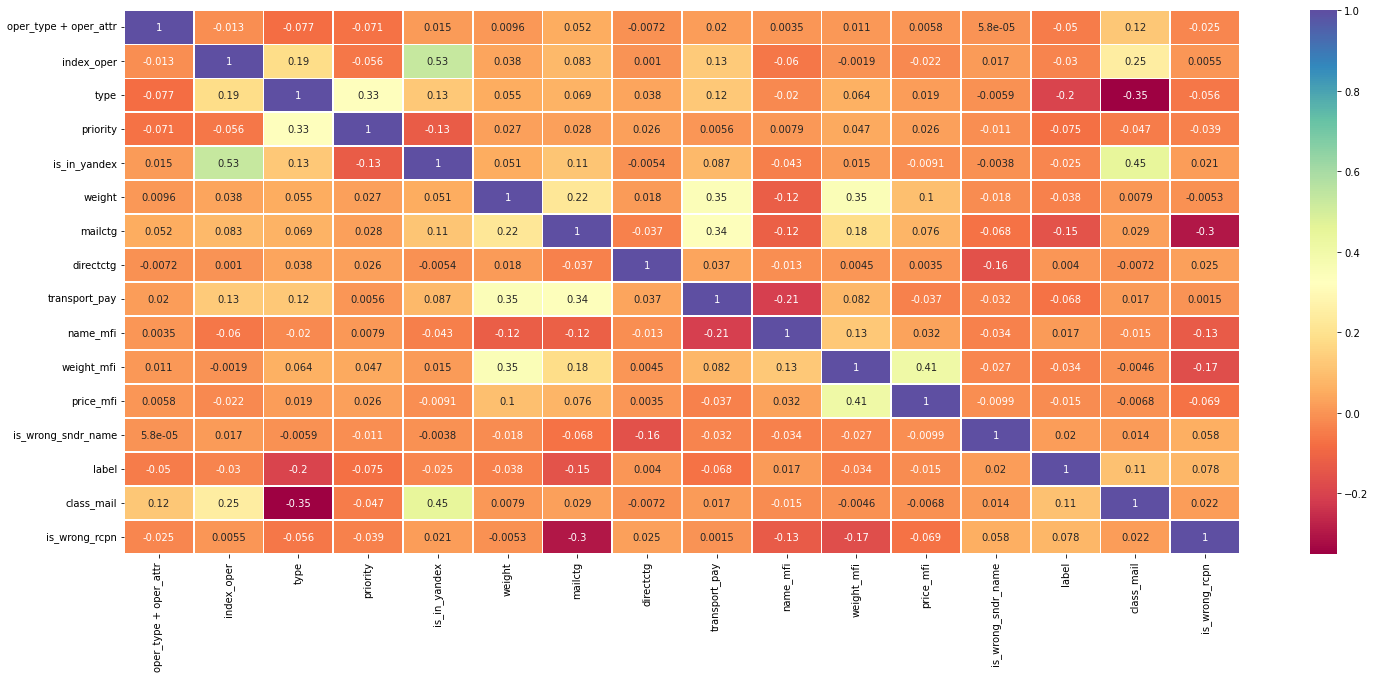

In [ ]:
plt.figure(figsize = (25, 10))
sns.heatmap(df.corr(), annot = True, linewidths=0.8, cmap = 'Spectral')

**Split dataset**

In [ ]:
# y_t = df_test['label']
# X_t = df_test.drop(['label'], axis= 1)
# X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [ ]:
# оставить половину данных
X, X_1, y, y_1 = train_test_split(X_sm, y_sm, test_size=0.5, random_state=42)
X_1 = 0
y_1 = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Functions

In [ ]:
# Фунция для расчета и вывода показателей моделей

def count_metrics(name_of_model):
    name_of_model.fit(X_train, y_train)
    # y_pred=name_of_model.predict(X_train)
    # y_predict_proba_train = name_of_model.predict_proba(X_train)[:,1]
    # score = recall_score(y_train, y_pred, average = "macro" )
    # print("Recall", score)
    # print('ROC-AUC: ', roc_auc_score(y_train, y_predict_proba_train))

    y_pred = name_of_model.predict(X_test)
    score = recall_score(y_test, y_pred, average = "macro" )
    y_predict_proba = name_of_model.predict_proba(X_test)[:, 1]
    print("Recall", score)
    print('ROC-AUC: ', roc_auc_score(y_test, y_predict_proba))

    result = (0.1 * recall_score(y_test, y_pred, average = "macro" )) + (0.9 * roc_auc_score(y_test, y_predict_proba))
    print('Result: ', result)

    gbcm=confusion_matrix(y_test, y_pred,normalize='true')
    rfcCMD = ConfusionMatrixDisplay(gbcm, display_labels=['0','1'])
    rfcCMD.plot(cmap = 'Greens')




# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg =LogisticRegression()


In [ ]:
count_metrics(LogReg)

**MinMax Scaler**

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# scaled_minmax = minmax.fit_transform(X_train)
# X_train = pd.DataFrame(scaled_minmax, columns = X_train.columns)
# scaled_minmax_ = minmax.fit_transform(X_test)
# X_test = pd.DataFrame(scaled_minmax_, columns = X_test.columns)

**RFECV**
(recursive feature elimination with cross validation)

In [ ]:
#from sklearn.feature_selection import RFECV

In [ ]:
#rfecv = RFECV(estimator=LogReg, cv=3, scoring= 'recall', n_jobs= -1)

In [ ]:
# rfecv.fit(X_train, y_train)
# print(f"Optimal features is: {rfecv.n_features_}")

# size(10, 6)
# plt.xlabel("Number of features") 
# plt.ylabel("recall") 
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_) 




#Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#forestmodel = RandomForestClassifier(n_estimators = 60, random_state = 42, max_depth=12)

In [ ]:
forestmodel = RandomForestClassifier(n_estimators = 15, random_state = 42, max_depth=8)

Recall 0.9695673568878537
ROC-AUC:  0.9863098348681145
Result:  0.9846355870700885


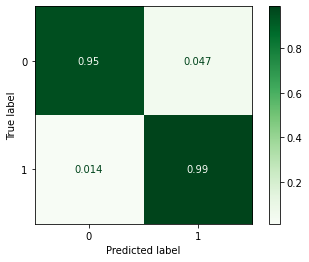

In [ ]:
count_metrics(forestmodel)

In [ ]:
# for i in range(8, 20, 4):
#   forestmodel = RandomForestClassifier(n_estimators=60, random_state=1234, max_depth=12)
#   print('глубина: ', i)
#   count_metrics(forestmodel)

['0', '1', '2', '6']


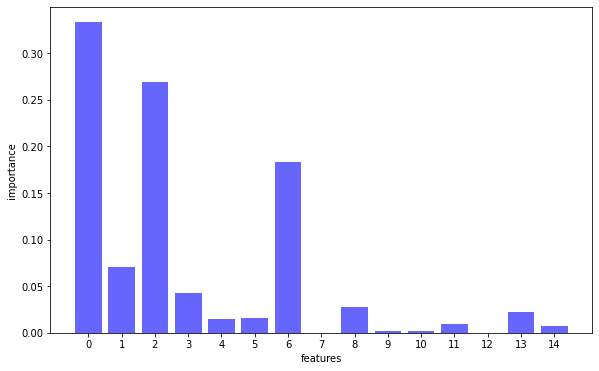

In [ ]:
# Выбор важных признаков

important_features = []
for x,i in enumerate(forestmodel.feature_importances_):
    if i>np.average(forestmodel.feature_importances_):
        important_features.append(str(x))
print (important_features)


plt.figure(figsize=(6 * 1.618, 6))
feature_import=forestmodel.feature_importances_
index = np.arange(len(feature_import))
plt.bar(index, feature_import, color='blue', alpha=0.6)
plt.xlabel('features')
plt.ylabel('importance')
plt.xticks(index)
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9322160 entries, 2373754 to 6423388
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   oper_type + oper_attr  int64  
 1   index_oper             int32  
 2   type                   int64  
 3   priority               int8   
 4   is_in_yandex           int8   
 5   weight                 int32  
 6   mailctg                int8   
 7   directctg              int8   
 8   transport_pay          float64
 9   name_mfi               int64  
 10  weight_mfi             int16  
 11  price_mfi              int32  
 12  is_wrong_sndr_name     int8   
 13  class_mail             int8   
 14  is_wrong_rcpn          int8   
dtypes: float64(1), int16(1), int32(3), int64(3), int8(7)
memory usage: 542.3 MB


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf=8)

Recall 0.9750813002823836
ROC-AUC:  0.9826566486966745
Result:  0.9818991138552453


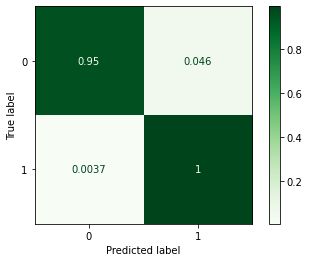

In [ ]:
count_metrics(treemodel)

Посмотрим ведущие признаки

In [ ]:
importances = treemodel.feature_importances_
feature_list = list(X_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,type,0.459373
1,oper_type + oper_attr,0.293313
2,index_oper,0.189956
3,class_mail,0.047125
4,mailctg,0.002540
5,transport_pay,0.002222
6,price_mfi,0.001127
7,is_in_yandex,0.000929
8,weight,0.000875
9,priority,0.000813


In [ ]:
# tree = tree.export_graphviz(dtreeregmodel)
# graph = graphviz.Source(tree)  
# graph 

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=60, learning_rate=0.1,
                                max_depth=5, random_state=42)

In [ ]:
count_metrics(gb)

KeyboardInterrupt: ignored

In [ ]:
# for i in range(, 100, 20):
#   gb = GradientBoostingClassifier(n_estimators=40, random_state=42, max_depth=6, learning_rate=i)
#   print('tree: ', i)
#   count_metrics(gb)

#Light GBM

In [ ]:
!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lgbm = LGBMClassifier(n_estimators = 70, random_state=42) #  (cat_features = cat_feat)

Recall 0.9774166219672238
ROC-AUC:  0.9918445553911069
Result:  0.9904017620487187


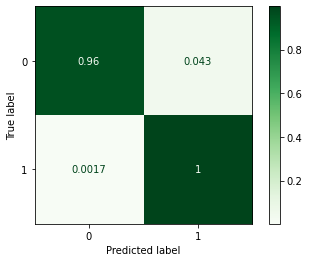

In [ ]:
count_metrics(lgbm)

# XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
xgboost = xgb.XGBClassifier(n_estimators = 50, max_depth=8, learning_rate=0.1)

In [ ]:
xgboost.fit(X_train, y_train)

Recall 0.9754305940332149
ROC-AUC:  0.9840652347025368
Result:  0.9832017706356047


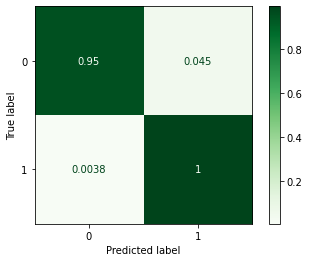

In [ ]:
count_metrics(xgboost)

In [ ]:
xgb.plot_importance(xgboost)
plt.rcParams['figure.figsize'] = [5, 3]
plt.show()

In [ ]:
for i in range(80, 300, 50):
  xgb = GradientBoostingClassifier(n_estimators=i, random_state=42, max_depth=6, learning_rate=0.1)
  print('tree: ', i)
  count_metrics(xgb)

# TEST

In [ ]:
df_valid = pd.read_csv('/content/drive/MyDrive/test_dataset_pochta.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_valid= df_valid.drop(columns=['id',	'postmark', 'mailrank'])
df_valid.loc[(df_valid.transport_pay > 0), 'transport_pay'] = 1
df_valid = df_valid.drop(columns=['is_return'])
df_valid = df_valid.drop(columns=['is_privatecategory'])
df_valid['is_in_yandex'] = df_valid['is_in_yandex'].replace('0', 0)
df_valid['is_in_yandex'] = df_valid['is_in_yandex'].replace('Y', 1)
df_valid['is_in_yandex'] = df_valid['is_in_yandex'].replace('N', 0)            
df_valid= df_valid.drop(columns=['mailtype'])
df_valid['class_mail'] = df_valid['class']
df_valid = df_valid.drop('class', axis=1) 
df_valid.loc[(df_valid.class_mail > 0), 'class_mail'] = 1
df_valid = df_valid.drop(columns = ['total_qty_over_index', 'total_qty_over_index_and_type', 'dist_qty_oper_login_1',
                                    'total_qty_oper_login_1', 'total_qty_oper_login_0'])

In [ ]:
df_valid.index_oper = pd.to_numeric(df_valid.index_oper, errors= 'coerce').fillna(0).astype(np.int64)
df_valid['weight_mfi'] = df_valid['weight_mfi'].astype(np.int64)
df_valid['price_mfi'] = df_valid['price_mfi'].astype(np.int64)
df_valid['weight'] = df_valid['weight'].astype(np.int64)
df_valid['priority'] = df_valid['priority'].astype(np.int8)
df_valid['class_mail'] = df_valid['class_mail'].astype(np.int8)
df_valid['mailctg'] = df_valid['mailctg'].astype(np.int8)
df_valid['directctg'] = df_valid['directctg'].astype(np.int8)

num_feat = df_valid.select_dtypes('int64')
for el in num_feat:
    for n_type in (np.int32, np.int16, np.int8):
        if (df_valid[el] == df_valid[el].astype(n_type)).sum() == len(df_valid):
            df_valid[el] = df_valid[el].astype(n_type)


In [ ]:
df_valid.name_mfi = df_valid.name_mfi.str.lower()

In [ ]:
df_valid['is_wrong_rcpn'] = df_valid['is_wrong_rcpn_name'] + df_valid['is_wrong_phone_number'] + df_valid['is_wrong_address']
df_valid = df_valid.drop(columns = ['is_wrong_rcpn_name', 'is_wrong_phone_number', 'is_wrong_address'])


In [ ]:
df_valid.loc[(df_valid.is_wrong_rcpn > 0), 'is_wrong_rcpn'] = 1

In [ ]:
cat_feat = df_valid.select_dtypes(include='object')
df_valid['type'] = df_valid['type'].replace(0, 'unknown')
df_valid['name_mfi'] = df_valid['name_mfi'].replace(0, 'unknown')
df_valid['oper_type + oper_attr'] = df_valid['oper_type + oper_attr'].replace(0, 'unknown')
cat_feat.describe()


,oper_type + oper_attr,type,name_mfi
count,4000000,4000000,4000000
unique,102,20,195628
top,1020_-1,Цех,0
freq,461403,1395154,544856


In [ ]:
for columns in cat_feat:
  encoder = preprocessing.LabelEncoder()
  encoder = encoder.fit(df_valid[columns])
  df_valid[columns] = encoder.transform(df_valid[columns])

In [ ]:
# minmax = MinMaxScaler()
# scaled_minmax = minmax.fit_transform(df_valid)
# df_valid= pd.DataFrame(scaled_minmax, columns = df_valid.columns)

In [ ]:
df_valid.shape

In [ ]:
label = forestmodel.predict(df_valid)

In [ ]:
label.shape

In [ ]:
df_valid = pd.read_csv('/content/drive/MyDrive/test_dataset_pochta.csv')

In [ ]:
answer = []
my_answer = pd.DataFrame(data=answer)
my_answer['label'] = pd.DataFrame(data=label)

In [ ]:
my_answer = df_valid.join(my_answer)

In [ ]:
my_answer = my_answer[['id', 'label']]

In [ ]:
my_answer

In [ ]:
my_answer.label.value_counts()

In [ ]:
my_answer.to_csv('solution_RF.csv',index=False)